# Exercise 1 INF201 

### Task 1: a greating

Write a program that asks a user for a name and prints out a greeting. Program execution may look like this, where "Jonas" is user input:

In [3]:
name_1 = input('Please enter your name: ')
print(f'Welcome to INF201, {name_1}')

Welcome to INF201, Frederic


### Task 2: A pretty greating

Based on Task 1, write a program that places the greeting into a frame. Only the output is shown below for two cases. Make sure that the width of the frame adapts to the length of the name entered.

In [4]:
def print_nice_output(name):
    output = 'Welcome to INF201, ' + name + '!'
    print('*' * (len(output)+4))
    print('*',output,'*')
    print('*' * (len(output)+4))

name_2 = input('Please enter your name: ')
print_nice_output(name_2)

********************************
* Welcome to INF201, Frederic! *
********************************


### Task 3: Tabulate numbers

Write a program that tabulates the squares and third powers of the numbers from 0 to 10. Try to format the table nicely. Output may look like this:

In [5]:
print(f"{'x':<5}{'x^2':<5}{'x^3':<5}")
print('-' * 15)

for x in range(11):
    print(f"{x:<5}{x**2:<5}{x**3:<5}")

print('-' * 15)

x    x^2  x^3  
---------------
0    0    0    
1    1    1    
2    4    8    
3    9    27   
4    16   64   
5    25   125  
6    36   216  
7    49   343  
8    64   512  
9    81   729  
10   100  1000 
---------------


### Task 4

Download the file norway_municipalities_2017.csv Download norway_municipalities_2017.csv . If you cannot download this file, go to modules in Canvas, where you can find the file in the folder Exercise 1. It contains a list of all Norwegian municipalities, the district (fylke) they belong to, and their population (data from 2017).

Write a program that reads this file, calculates the population for each of the 19 districts, and prints this as a well-formatted table in alphabetical order. Your program should only use built-in Python features and not contain any import statements. Between 10 and 20 lines of code should be enough to solve this task. 

Sort the table in descending order of population, i.e., beginning with the most populous district.

**Code below just for visualization of the data**

In [6]:
import pandas as pd

municipalities_df = pd.read_csv("data/norway_municipalities_2017.csv")
municipalities_df.head()

,Municipality,District,Population
0,Halden,Østfold,30790
1,Moss,Østfold,32407
2,Sarpsborg,Østfold,55127
3,Fredrikstad,Østfold,80121
4,Hvaler,Østfold,4517


In [7]:
districts = {}

with open("data/norway_municipalities_2017.csv","r") as data:
    population_dict = {}
    next(data)
    for line in data:
        parts = line.strip().split(',')
        district, population = parts[1], int(parts[2])
        if district in districts:
            districts[district] += population
        else:
            districts[district] = population

    sorted_districts = sorted(districts.items(), key=lambda x: x[1], reverse=True)

    print(f"{'District':<20}{'Population':>10}")
    print('-' * 30)
    for district, population in sorted_districts:
        print(f"{district:<20}{population:>10}")

District            Population
------------------------------
Oslo                    666759
Akershus                604368
Hordaland               519963
Rogaland                472024
Sør-Trøndelag           317363
Østfold                 292893
Buskerud                279714
Møre og Romsdal         266274
Vestfold                247048
Nordland                242866
Hedmark                 196190
Oppland                 189479
Vest-Agder              184116
Telemark                173307
Troms - Romsa           165632
Nord-Trøndelag          137233
Aust-Agder              116673
Sogn og Fjordane        110266
Finnmark - Finnmárku     76149


### Task 5: Plot data

Write a program that works on the same data as Task 4, but plots the population of the districts as a bar diagram (one bar per district). You can either extend the program from Task 4 using, e.g., matplotlib for plotting, or write a new program. If you know Pandas, see if you can reduce reading the file, computing the sums, and plotting to a single line of code. You probably need to add plt.show() at the end of the program to see the plot.

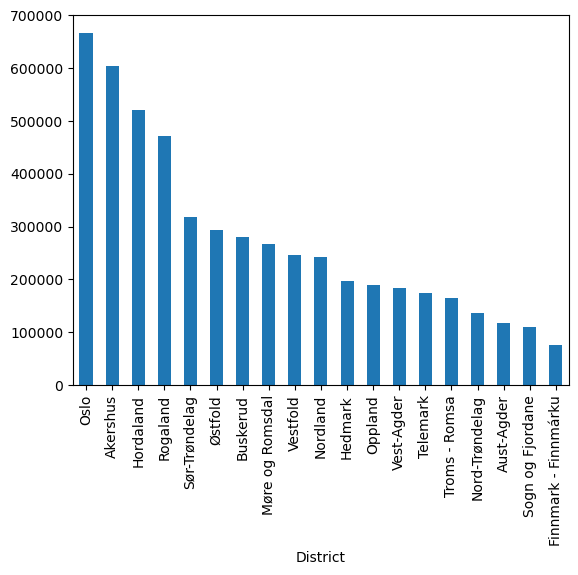

In [8]:
municipalities_df = pd.read_csv("data/norway_municipalities_2017.csv")
districts_df = municipalities_df.groupby('District')['Population'].sum().sort_values(ascending=False).plot.bar()